In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import re
import json
import copy

import nltk
from nltk.stem import WordNetLemmatizer
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

from tqdm import tqdm

In [21]:
from transformers import pipeline

In [22]:
import spacy

# Load nlp model
nlp = spacy.load('en_core_web_sm')

# Load Data

In [23]:
with open("temp/meta-data.json", "r") as file:
    data = json.load(file)

print(len(data))

1511


In [24]:
df = pd.DataFrame.from_dict(data, orient='index')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         1511 non-null   int64 
 1   review_time       1511 non-null   object
 2   like              1511 non-null   int64 
 3   review            1511 non-null   object
 4   review_processed  1511 non-null   object
 5   aspect_sentiment  1511 non-null   object
dtypes: int64(2), object(4)
memory usage: 82.6+ KB
None


,review_id,review_time,like,review,review_processed,aspect_sentiment
0,0,2024-11-28,0,The cars design is like it came from a cartoon.,The cars design is like it came from a cartoon.,"[{'term': 'cars design', 'class': 'negative', ..."
1,2,2024-11-27,0,Tankz u for being so honest.\nMuch love and re...,Tankz u for being so honest.\nMuch love and re...,"[{'term': 'much love', 'class': 'positive', 'p..."
2,3,2024-11-26,0,Amazing review your really good at this love w...,Amazing review your really good at this love w...,"[{'term': 'well', 'class': 'positive', 'probab..."
3,5,2024-11-25,0,"Honestly, the Cybertruck might be the first ca...",The Cybertruck might be the first car I've eve...,"[{'term': 'first car', 'class': 'negative', 'p..."
4,6,2024-11-25,0,I will be buying one anytime soon add expensiv...,I will be buying one anytime soon. It's a very...,"[{'term': 'stuff', 'class': 'positive', 'proba..."


# Aspect Classification

In [25]:
with open('temp/topic-classification.json', 'r', encoding='utf-8') as f:
    classification = json.load(f)
print(len(classification))

9


In [26]:
def get_key(dictionary, value):
    for k, v in dictionary.items():
        if value in v:
            return k
    return
            
def generate_topics(dictionary):
    return list(dictionary.keys())

In [27]:
# Save topic-aspect dataframe

# Padding dictionary
def padding(dict_: dict):
    result = {}
    target_length = max([len(x) for x in dict_.values()])
    for k, v in dict_.items():
        result[k] = v + [np.nan] * (target_length - len(v))
    return result


padded_aspects = padding(classification)

df_topic_aspect = pd.DataFrame.from_dict(padded_aspects)

df_topic_aspect.head()

,0,1,2,3,4,5,6,7,8
0,lewis sandra,review,cyber,business,failure,vehicle,question,video,design
1,davis scott,bad review,sound,market,safety,car,stuff,many videos,iconic design
2,garcia paul,reliable review,tool,production,disaster,certain vehicles,comment,best videos,steel
3,davis patricia,best review,power,sale,important problems,truck,time,other videos,design and
4,davis sandra,product reviews,gun,place,death,vehicle style,job,video man,better design


In [28]:
# Save to excel

df_topic_aspect.to_excel("table/topic-aspect.xlsx", index=False)

# Table Main

In [29]:
df.head()

,review_id,review_time,like,review,review_processed,aspect_sentiment
0,0,2024-11-28,0,The cars design is like it came from a cartoon.,The cars design is like it came from a cartoon.,"[{'term': 'cars design', 'class': 'negative', ..."
1,2,2024-11-27,0,Tankz u for being so honest.\nMuch love and re...,Tankz u for being so honest.\nMuch love and re...,"[{'term': 'much love', 'class': 'positive', 'p..."
2,3,2024-11-26,0,Amazing review your really good at this love w...,Amazing review your really good at this love w...,"[{'term': 'well', 'class': 'positive', 'probab..."
3,5,2024-11-25,0,"Honestly, the Cybertruck might be the first ca...",The Cybertruck might be the first car I've eve...,"[{'term': 'first car', 'class': 'negative', 'p..."
4,6,2024-11-25,0,I will be buying one anytime soon add expensiv...,I will be buying one anytime soon. It's a very...,"[{'term': 'stuff', 'class': 'positive', 'proba..."


In [30]:
topic_json = {k: 0 for k in list(classification.keys())}
topic_json

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0}

**Topic Classification**

In [31]:
# Topic records

records = []
for _, row in df.iterrows():
    record = {'review_id': row['review_id']}
    items = row['aspect_sentiment']
    record.update(topic_json.copy())
    for item in items:
        term = item['term']
        topic = get_key(classification, term)
        if topic:
            record[topic] = 1
    records.append(record)

records[:5]

[{'review_id': 0,
  '0': 0,
  '1': 0,
  '2': 0,
  '3': 0,
  '4': 0,
  '5': 1,
  '6': 0,
  '7': 0,
  '8': 0},
 {'review_id': 2,
  '0': 0,
  '1': 0,
  '2': 0,
  '3': 0,
  '4': 0,
  '5': 0,
  '6': 1,
  '7': 0,
  '8': 0},
 {'review_id': 3,
  '0': 0,
  '1': 0,
  '2': 0,
  '3': 0,
  '4': 1,
  '5': 0,
  '6': 1,
  '7': 0,
  '8': 0},
 {'review_id': 5,
  '0': 0,
  '1': 0,
  '2': 0,
  '3': 0,
  '4': 0,
  '5': 1,
  '6': 0,
  '7': 0,
  '8': 0},
 {'review_id': 6,
  '0': 0,
  '1': 0,
  '2': 0,
  '3': 0,
  '4': 0,
  '5': 1,
  '6': 1,
  '7': 0,
  '8': 0}]

**Save Table per Topic**

In [32]:
topic_df = pd.DataFrame.from_dict(records)

topic_df.head()

,review_id,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,1,0,0,0
1,2,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,1,0,1,0,0
3,5,0,0,0,0,0,1,0,0,0
4,6,0,0,0,0,0,1,1,0,0


In [33]:
def formatting_aspect(items):
    format = ""
    for i, item in enumerate(items):
        term = item.get('term')
        sentiment = item.get('class')
        if get_key(classification, term):
            format += f"● {term}: {sentiment}"
            if i != len(items) - 1:
                format += "\n"
    return format

def generate_table(df: pd.DataFrame, topic_df: pd.DataFrame, topic: str):
    drop = ['review_processed']
    mask = topic_df[topic_df[topic] == 1]['review_id'].values
    result = df[df['review_id'].isin(mask)].copy()
    result['aspect_sentiment'] = result['aspect_sentiment'].apply(formatting_aspect)
    result['topic'] = [topic] * result.shape[0]
    result = result.drop(drop, axis=1).sort_values(by='review_time').reset_index(drop=True)

    return result

In [34]:
topics = generate_topics(classification)

frames = []
for topic in topics:
    temp = generate_table(df, topic_df, topic)
    frames.append(temp)
    # Save to excel
    # temp.to_excel(f"table/main_mcd_{topic}.xlsx", index=False)

In [35]:
df_main = pd.concat(frames).sort_values(by='review_time')

print(df_main.info())
df_main.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 0 to 535
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         3069 non-null   int64 
 1   review_time       3069 non-null   object
 2   like              3069 non-null   int64 
 3   review            3069 non-null   object
 4   aspect_sentiment  3069 non-null   object
 5   topic             3069 non-null   object
dtypes: int64(2), object(4)
memory usage: 167.8+ KB
None


,review_id,review_time,like,review,aspect_sentiment,topic
0,2774,2024-04-01,0,Only saw pictures of it before but yesterday I...,● person: negative\n● ugly vehicle: negative\n...,0
16,2601,2024-04-01,1,Cybertruck is for the nerd gamers from moms ba...,● cybertruck: negative\n● barebones f150: nega...,3
15,2511,2024-04-01,0,please give your editing team a raise! very ta...,● raise: positive\n● team: positive,3
14,2473,2024-04-01,0,I don't believe this is independant journalism...,● independent journalism: negative,3
13,2483,2024-04-01,0,Something that ugly doesn't deserve to be icon...,● whole world: neutral\n● teslamusk cult: nega...,3


In [36]:
df_main[df_main['review_id'] == 0]

,review_id,review_time,like,review,aspect_sentiment,topic
535,0,2024-11-28,0,The cars design is like it came from a cartoon.,● cars design: negative,5


In [37]:
# Save to excel
df_main.to_excel("table/main.xlsx", index=False)

# Table Aspects

In [38]:
df.head()

,review_id,review_time,like,review,review_processed,aspect_sentiment
0,0,2024-11-28,0,The cars design is like it came from a cartoon.,The cars design is like it came from a cartoon.,"[{'term': 'cars design', 'class': 'negative', ..."
1,2,2024-11-27,0,Tankz u for being so honest.\nMuch love and re...,Tankz u for being so honest.\nMuch love and re...,"[{'term': 'much love', 'class': 'positive', 'p..."
2,3,2024-11-26,0,Amazing review your really good at this love w...,Amazing review your really good at this love w...,"[{'term': 'well', 'class': 'positive', 'probab..."
3,5,2024-11-25,0,"Honestly, the Cybertruck might be the first ca...",The Cybertruck might be the first car I've eve...,"[{'term': 'first car', 'class': 'negative', 'p..."
4,6,2024-11-25,0,I will be buying one anytime soon add expensiv...,I will be buying one anytime soon. It's a very...,"[{'term': 'stuff', 'class': 'positive', 'proba..."


In [39]:
# Output: id, date, aspect, sentiment, topic
def recording_aspect(row):
    records = []
    id_ = row['review_id']
    date_ = row['review_time']
    items = row['aspect_sentiment']
    like = row['like']
    
    for item in items:
        aspect = item.get('term')
        aspect = nlp(aspect)[0:].lemma_
        sentiment = item.get('class')
        topic = get_key(classification, aspect)
        records.append({'review_id': id_, 'review_time': date_, 'aspect':aspect, 'sentiment': sentiment, 'topic': topic, 'like': like})
    return records

In [40]:
records = []

for _, row in df.iterrows():
    records += recording_aspect(row)

records[:5]

[{'review_id': 0,
  'review_time': '2024-11-28',
  'aspect': 'car design',
  'sentiment': 'negative',
  'topic': '5',
  'like': 0},
 {'review_id': 2,
  'review_time': '2024-11-27',
  'aspect': 'much love',
  'sentiment': 'positive',
  'topic': '6',
  'like': 0},
 {'review_id': 2,
  'review_time': '2024-11-27',
  'aspect': 'tankz u',
  'sentiment': 'positive',
  'topic': '6',
  'like': 0},
 {'review_id': 3,
  'review_time': '2024-11-26',
  'aspect': 'well',
  'sentiment': 'positive',
  'topic': '6',
  'like': 0},
 {'review_id': 3,
  'review_time': '2024-11-26',
  'aspect': 'love',
  'sentiment': 'positive',
  'topic': '6',
  'like': 0}]

In [41]:
df_record = pd.DataFrame.from_dict(records)

# Create pivot table
df_aspect = (
    df_record.groupby(["aspect", "review_time", "sentiment"])['review_time']
    .count()
    .unstack("sentiment", fill_value=0)
    .sort_values(by='review_time')
).reset_index()

df_aspect['total'] = df_aspect['negative'] + df_aspect['positive'] + df_aspect['neutral']

# Fix datetime
# Convert review_time to datetime
df_aspect['review_time'] = pd.to_datetime(df_aspect['review_time'])

# Extract year and month
df_aspect['month'] = df_aspect['review_time'].apply(lambda x: x.replace(day=1).date())
df_aspect['year'] = df_aspect['review_time'].apply(lambda x: x.replace(day=1, month=1).date())
df_aspect['review_time'] = df_aspect['review_time'].apply(lambda x: x.date())

df_aspect = df_aspect.rename_axis(index=None, columns=None)

# Identify categorical and date columns
categorical_date_columns = ['aspect', 'review_time', 'year', 'month']

# Identify numeric columns
numeric_columns = [col for col in df_aspect.columns if col not in categorical_date_columns]

df_aspect = df_aspect[categorical_date_columns + numeric_columns]

df_aspect.head()

,aspect,review_time,year,month,negative,neutral,positive,total
0,super duke,2024-04-01,2024-01-01,2024-04-01,1,0,0,1
1,bulletproof steel,2024-04-01,2024-01-01,2024-04-01,0,0,1,1
2,usa,2024-04-01,2024-01-01,2024-04-01,0,1,0,1
3,life scour,2024-04-01,2024-01-01,2024-04-01,0,0,1,1
4,bulletproof part,2024-04-01,2024-01-01,2024-04-01,1,0,0,1


**Save Table per Aspect**

In [42]:
df_aspect.to_excel("table/aspect.xlsx", index=False)

**Mapping Topic-Aspect**

In [43]:
df_aspect['topic'] = df_aspect['aspect'].apply(lambda x: get_key(classification, x))

df_aspect.head()

,aspect,review_time,year,month,negative,neutral,positive,total,topic
0,super duke,2024-04-01,2024-01-01,2024-04-01,1,0,0,1,2
1,bulletproof steel,2024-04-01,2024-01-01,2024-04-01,0,0,1,1,8
2,usa,2024-04-01,2024-01-01,2024-04-01,0,1,0,1,3
3,life scour,2024-04-01,2024-01-01,2024-04-01,0,0,1,1,None
4,bulletproof part,2024-04-01,2024-01-01,2024-04-01,1,0,0,1,8


# Table Trend

In [44]:
df_record.head()

,review_id,review_time,aspect,sentiment,topic,like
0,0,2024-11-28,car design,negative,5,0
1,2,2024-11-27,much love,positive,6,0
2,2,2024-11-27,tankz u,positive,6,0
3,3,2024-11-26,well,positive,6,0
4,3,2024-11-26,love,positive,6,0


In [45]:
# Create trend dataframe

temp_1 = ( df_record.groupby(["topic", "review_time"])
    .agg({'like': ['sum', 'count']})
    .sort_values(by='review_time')
).reset_index()

temp_1.columns = ['_'.join(col).strip() if len(col[-1]) > 0 else col[0] for col in temp_1.columns.values]

temp_2 = (
    df_record.groupby(["topic", "review_time", "sentiment"])['review_time']
    .count()
    .unstack("sentiment", fill_value=0)
    .sort_values(by='review_time')
).reset_index()

df_trend = temp_1.merge(temp_2, on=['topic', 'review_time'])
df_trend['total'] = df_trend['negative'] + df_trend['positive'] + df_trend['neutral']

df_trend.head()

,topic,review_time,like_sum,like_count,negative,neutral,positive,total
0,0,2024-04-01,3,4,3,0,1,4
1,8,2024-04-01,109,40,21,1,18,40
2,1,2024-04-01,3,6,0,1,5,6
3,7,2024-04-01,30,17,3,1,13,17
4,3,2024-04-01,126,35,19,4,12,35


In [46]:
# Fix datetime
# Convert review_time to datetime
df_trend['review_time'] = pd.to_datetime(df_trend['review_time'])

# Extract year and month
df_trend['month'] = df_trend['review_time'].apply(lambda x: x.replace(day=1).date())
df_trend['year'] = df_trend['review_time'].apply(lambda x: x.replace(day=1, month=1).date())
df_trend['review_time'] = df_trend['review_time'].apply(lambda x: x.date())

# Identify categorical and date columns
categorical_date_columns = ['topic', 'review_time', 'year', 'month']

# Identify numeric columns
numeric_columns = [col for col in df_trend.columns if col not in categorical_date_columns]


df_trend = df_trend[categorical_date_columns + numeric_columns]

df_trend.head()

,topic,review_time,year,month,like_sum,like_count,negative,neutral,positive,total
0,0,2024-04-01,2024-01-01,2024-04-01,3,4,3,0,1,4
1,8,2024-04-01,2024-01-01,2024-04-01,109,40,21,1,18,40
2,1,2024-04-01,2024-01-01,2024-04-01,3,6,0,1,5,6
3,7,2024-04-01,2024-01-01,2024-04-01,30,17,3,1,13,17
4,3,2024-04-01,2024-01-01,2024-04-01,126,35,19,4,12,35


**Save Table Trend**

In [47]:
df_trend.to_excel("table/trend.xlsx", index=False)

# Prepare Table for SWOT Analysis

In [48]:
swot_json = {k: f"Descriptive sentiment summary with bullet point format only about {k}:\n\n" for k in list(classification.keys())}
swot_json

{'0': 'Descriptive sentiment summary with bullet point format only about 0:\n\n',
 '1': 'Descriptive sentiment summary with bullet point format only about 1:\n\n',
 '2': 'Descriptive sentiment summary with bullet point format only about 2:\n\n',
 '3': 'Descriptive sentiment summary with bullet point format only about 3:\n\n',
 '4': 'Descriptive sentiment summary with bullet point format only about 4:\n\n',
 '5': 'Descriptive sentiment summary with bullet point format only about 5:\n\n',
 '6': 'Descriptive sentiment summary with bullet point format only about 6:\n\n',
 '7': 'Descriptive sentiment summary with bullet point format only about 7:\n\n',
 '8': 'Descriptive sentiment summary with bullet point format only about 8:\n\n'}

In [49]:
for items in df['aspect_sentiment'].values:
    for item in items:
        if len(item) == 0:
            continue
        term = item.get('term')
        context = item.get('context')
        if len(context) > 0:
            context = context[0]
            class_ = get_key(classification, term)
            if context not in swot_json[class_]:
                swot_json[class_] = swot_json[class_] + "- " + context + "\n"

df_context_topic = pd.DataFrame.from_dict(swot_json, 'index', columns=['context']).T
df_context_topic

,0,1,2,3,4,5,6,7,8
context,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...,Descriptive sentiment summary with bullet poin...


In [50]:
df_context_topic.to_excel("table/context_table.xlsx", index=False)

PROMPT SUMMARIZE FORMAT:

Descriptive sentiment summary with bullet point format only about "topic": <text>

# Exploratory Data Analysis

**Table Trend**

In [51]:
# Distribution review

df_trend.head()

,topic,review_time,year,month,like_sum,like_count,negative,neutral,positive,total
0,0,2024-04-01,2024-01-01,2024-04-01,3,4,3,0,1,4
1,8,2024-04-01,2024-01-01,2024-04-01,109,40,21,1,18,40
2,1,2024-04-01,2024-01-01,2024-04-01,3,6,0,1,5,6
3,7,2024-04-01,2024-01-01,2024-04-01,30,17,3,1,13,17
4,3,2024-04-01,2024-01-01,2024-04-01,126,35,19,4,12,35


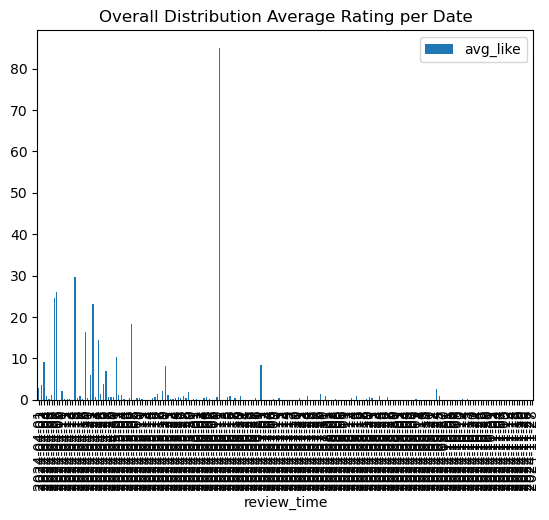

In [52]:
temp = df_trend.groupby('review_time').agg({'like_sum': 'sum', 'like_count': 'sum'})
temp['avg_like'] = (temp['like_sum'] / temp['like_count']).fillna(0)

temp.drop(['like_sum', 'like_count'], axis=1).plot(kind='bar', title="Overall Distribution Average Rating per Date")
plt.show()

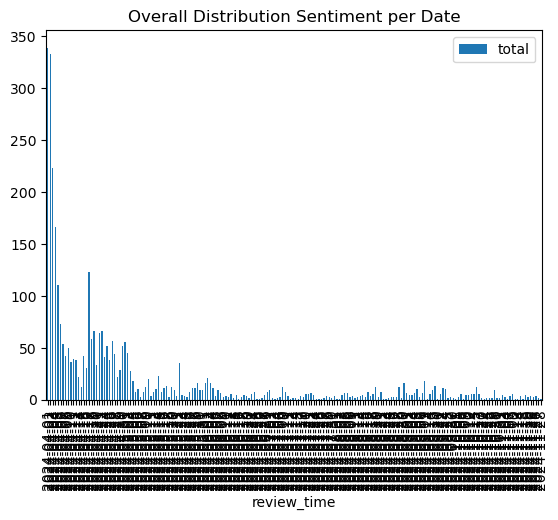

In [53]:
df_trend.groupby('review_time').agg({'total':'sum'}).plot(kind='bar', title="Overall Distribution Sentiment per Date")
plt.show()

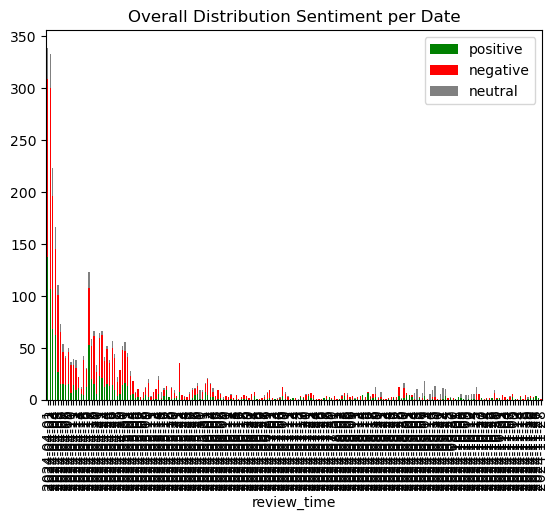

In [54]:
df_trend\
    .groupby('review_time')\
    .agg({'positive':'sum', 
          'negative':'sum',
          'neutral': 'sum'})\
    .plot(kind='bar', 
          title="Overall Distribution Sentiment per Date",
          stacked=True, 
          color=['green', 'red', 'gray'])

plt.show()

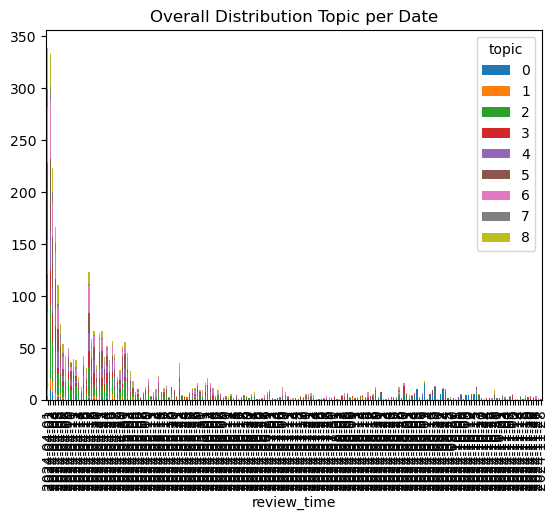

In [55]:
df_trend\
    .groupby(['review_time', 'topic'])\
    .agg({'total': 'sum'})\
    .rename({'total': 'count'}, axis=1)\
    .reset_index()\
    .pivot(index='review_time', columns='topic', values='count')\
    .fillna(0)\
    .plot(kind='bar', stacked=True, title='Overall Distribution Topic per Date')

plt.show()

**Table Aspect**

In [56]:
topics = generate_topics(classification)

print(topics)

['0', '1', '2', '3', '4', '5', '6', '7', '8']


In [57]:
# VARIABLES
FROM_DATE = "2019-12-01"
TO_DATE = "2024-01-01"
TOPIC = "Food and Menu Items"

MIN_DATE = np.min(df_trend['review_time'])
FROM_DATE = pd.to_datetime(MIN_DATE).date() if len(FROM_DATE) == 0 else pd.to_datetime(FROM_DATE).date()


MAX_DATE = np.max(df_trend['review_time'])
TO_DATE = pd.to_datetime(MIN_DATE).date() if len(TO_DATE) == 0 else pd.to_datetime(TO_DATE).date()

In [58]:
df_aspect['review_time'] = df_aspect['review_time'].apply(lambda x: pd.to_datetime(x).date())
df_aspect.head()

,aspect,review_time,year,month,negative,neutral,positive,total,topic
0,super duke,2024-04-01,2024-01-01,2024-04-01,1,0,0,1,2
1,bulletproof steel,2024-04-01,2024-01-01,2024-04-01,0,0,1,1,8
2,usa,2024-04-01,2024-01-01,2024-04-01,0,1,0,1,3
3,life scour,2024-04-01,2024-01-01,2024-04-01,0,0,1,1,None
4,bulletproof part,2024-04-01,2024-01-01,2024-04-01,1,0,0,1,8


In [59]:
# Distribution per aspect

mask = (df_aspect['review_time'] >= FROM_DATE) & (df_aspect['review_time'] <= TO_DATE)
print("FROM_DATE: ", FROM_DATE)
print("TO_DATE: ", TO_DATE)

temp = df_aspect[mask].copy()
if len(temp) > 0:
    if TOPIC:
        mask = (temp['topic'] == TOPIC)
        temp = temp[mask].copy()
    temp = temp.drop(['review_time', 'year', 'month', 'topic'], axis=1).groupby(['aspect']).sum().sort_values(by='total', ascending=True)
    
    temp\
        .drop(['total'], axis=1)\
        .plot(kind='barh',
              stacked=True,
              color=['red', 'gray', 'green'])
    
    plt.show()
else:
    print("EMPTY FRAME")

FROM_DATE:  2019-12-01
TO_DATE:  2024-01-01
EMPTY FRAME


**Table Main**

In [60]:
df_main['review_time'] = df_main['review_time'].apply(lambda x: pd.to_datetime(x).date())
df_main.head()

,review_id,review_time,like,review,aspect_sentiment,topic
0,2774,2024-04-01,0,Only saw pictures of it before but yesterday I...,● person: negative\n● ugly vehicle: negative\n...,0
16,2601,2024-04-01,1,Cybertruck is for the nerd gamers from moms ba...,● cybertruck: negative\n● barebones f150: nega...,3
15,2511,2024-04-01,0,please give your editing team a raise! very ta...,● raise: positive\n● team: positive,3
14,2473,2024-04-01,0,I don't believe this is independant journalism...,● independent journalism: negative,3
13,2483,2024-04-01,0,Something that ugly doesn't deserve to be icon...,● whole world: neutral\n● teslamusk cult: nega...,3


In [61]:
pd.set_option('display.max_colwidth', 2000)

mask = (df_main['review_time'] >= FROM_DATE) & (df_main['review_time'] <= TO_DATE)
print("FROM_DATE: ", FROM_DATE)
print("TO_DATE: ", TO_DATE)

temp = df_main[mask].copy()

if TOPIC:
    mask = (temp['topic'] == TOPIC)
    temp = temp[mask].copy()

# if ASPECT:
    # mask = (temp['aspect'])

temp = temp[['review', 'aspect_sentiment', 'like']].sort_values(by='like', ascending=False)
temp

FROM_DATE:  2019-12-01
TO_DATE:  2024-01-01


,review,aspect_sentiment,like
